In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        WORLD\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
from nltk.corpus import stopwords
import string

<h2> BUILDING A SPAM DETECTION SYSTEMS WITH PYTHON </h2> 

<h4>LOADING THE DATASET</h4>

In [14]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [16]:
print(messages[3])

ham	U dun say so early hor... U c already then say...


In [13]:
len(messages)

5574

In [4]:
# creating a dataframe for the label and message of 'SMSSpamCollection' file
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h4>EXPLORING THE DATA SET</h4>

In [26]:
# grab the first row
df.loc[1, :]

label                                ham
message    Ok lar... Joking wif u oni...
Name: 1, dtype: object

In [30]:
# examining the dataset
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
# checking for the length of each messages

df['length'] = df.message.apply(len)

In [7]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
df.message.nunique()

5169

In [41]:
df.message.value_counts().head()

Sorry, I'll call later                                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                                    12
Ok...                                                                                                                                                                                  10
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...                     4
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.     4
Name: message, dtype: int64

<AxesSubplot:ylabel='Frequency'>

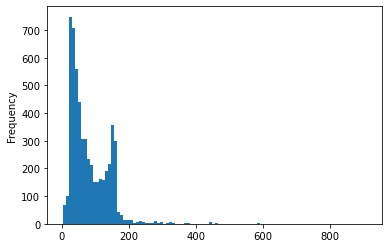

In [48]:
# visualising the length of each messags on hist plot
df.length.plot(kind='hist', bins=100)

<AxesSubplot:xlabel='length', ylabel='Count'>

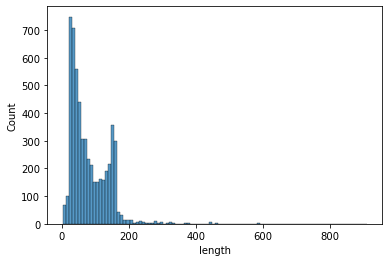

In [47]:
# visualization using seaborn
sns.histplot(df.length, bins=100)

In [49]:
# the histogram shows there is an outlier. seeing the table 
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<h4>PREPROCESSING STRINGS</h4>

In [100]:
# USING THE STRING METHOD

In [52]:
dummy_text = "Sample message! Notice: it has punctuation."

In [53]:
# visualising the possible punctuations in the string library
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
# removing punctuations from the dummy_text punctuation
no_punc = [c for c in dummy_text if c not in string.punctuation]
no_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [63]:
''.join(no_punc)

'Sample message Notice it has punctuation'

In [64]:
no_punc = ''.join(no_punc)
no_punc

'Sample message Notice it has punctuation'

In [65]:
# USING THE STOPWORDS METHOD FROM THE NLTK MODULE

In [74]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [71]:
cleaned_no_punc = [c for c in no_punc.split() if c not in stopwords.words('english')]

In [72]:
cleaned_no_punc

['Sample', 'message', 'Notice', 'punctuation']

In [8]:
# function that repeats the previous output of the cleaned_no_punc
def text_processing(text):
    """
    1) remove punctuation
    2) remove stop words
    3) return cleaned text without punctuation and stopwords 
    --> this returned cleaned text is a list of the words we want and this is called tokenization
    --> where each word is the token
    """
    no_punc = [c for c in text if c not in string.punctuation]
    no_punc = ''.join(no_punc)
    cleaned_no_punc = [char for char in no_punc.lower().split() if char not in stopwords.words('english')]
    return cleaned_no_punc

In [9]:
text_processing('hello world! i still talk about ade and i')

['hello', 'world', 'still', 'talk', 'ade']

In [10]:
df.message.head().apply(text_processing)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

<h4>VECTORIZING OUR TEXT USING BAG OF WORDS MODEL FOR MACHINE LEARNING TO UNDERSTAND IT</h4>
EACH DOCUMENT WILL HAVE AS MANY DIMENSIONS AS THERE ARE UNIQUE WORDS IN THE SMS CORPUS
<br>
<br>
<li>COUNT HOW MANYTIMES A WORD OCCOURS IN EACH MESSAGE (KNOWN AS TERM FREQUENCY)
<li>WEIGH THE COUNT SO THAT FREQUENT TOKENS GET THE LOWER WEIGHT (INVERSE DOCUMENT FREQUENCY)
<li>NORMALIZE THE VECTOR TO UNIT LENGHT, TO ABSTRACT FROM THE ORIGINAL TEXT LENGHT (L2 norm)
<br>
<br>
<li>CONVERT A COLLECTION OF TEXT DOCUMENT TO MATRIX OF TOKEN COUNT (BAG OF WORDS)
<li>CHECK FOR THE COUNT OF SPECIFIC WORDS IN EACH MESSAGES IN OUR DATA SET
<li>COLUMN: REP EACH MESSAGES (DOCUMENT)
<li>ROW: EACH UNIQUE WORDS 
<li>WE CAN VISUALISE THE TABLE OF WORD COUNT AS SHOWN BELOW IF FOR INSTACNE WE HAVE 3 MESSAGES IN OUR DATA:
<br>
<table>
    <tr>
        <th>Row No</th>
        <th>Message 1</th>
        <th>Message 2</th>
        <th>Message 3</th>
    <tr>
    <tr>
        <td>word1</td>
        <td>0</td>
        <td>2</td>
        <td>0</td>
    <tr>
    <tr>
        <td>word 2</td>
        <td>0</td>
        <td>5</td>
        <td>1</td>
    <tr>
    <tr>
        <td>.
            .
            .</td>
        <td>.
            .
            .</td>
        <td>.
            .
            .</td>
        <td>.
            .
            .</td>
    <tr>
</table>
<br>
<br>   
<li>BECAUSE THERE WILL BE TOO MANY WORDS WITH ZEROS(0) COUNTS IN A MESSAGE (DOCUMENT), SKLEARN IS GOING TO RETURN SPARSE MATRIX
<br>
<br> 
        
 

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# bow - Bag of Words
bow_transformer = CountVectorizer(analyzer=text_processing).fit(df.message)

In [13]:
# vocabulary list of unique tokens in our bag of words
len(bow_transformer.vocabulary_)

9530

In [20]:
# a dictionary of unique word in our corpus and their corresponding ids
# the keys of this dictionary becomes the features in the table of bag of words
bow_transformer.vocabulary_

{'go': 3786,
 'jurong': 4696,
 'point': 6445,
 'crazy': 2485,
 'available': 1389,
 'bugis': 1860,
 'n': 5686,
 'great': 3883,
 'world': 9208,
 'la': 4858,
 'e': 3016,
 'buffet': 1858,
 'cine': 2200,
 'got': 3843,
 'amore': 1156,
 'wat': 8969,
 'ok': 6006,
 'lar': 4897,
 'joking': 4664,
 'wif': 9103,
 'u': 8626,
 'oni': 6038,
 'free': 3571,
 'entry': 3152,
 '2': 416,
 'wkly': 9160,
 'comp': 2316,
 'win': 9117,
 'fa': 3290,
 'cup': 2541,
 'final': 3415,
 'tkts': 8398,
 '21st': 436,
 'may': 5345,
 '2005': 423,
 'text': 8233,
 '87121': 849,
 'receive': 6848,
 'questionstd': 6738,
 'txt': 8610,
 'ratetcs': 6791,
 'apply': 1242,
 '08452810075over18s': 72,
 'dun': 3002,
 'say': 7208,
 'early': 3023,
 'hor': 4219,
 'c': 1910,
 'already': 1129,
 'nah': 5693,
 'dont': 2907,
 'think': 8309,
 'goes': 3800,
 'usf': 8760,
 'lives': 5060,
 'around': 1293,
 'though': 8328,
 'freemsg': 3579,
 'hey': 4114,
 'darling': 2605,
 '3': 527,
 'weeks': 9023,
 'word': 9194,
 'back': 1442,
 'id': 4340,
 'like': 5

###### testing the count vectorizer on a document (document at index 3) from our corpus of document

In [16]:
# testing the bag of words transfore 
mess4 = df.message[3]

In [17]:
mess4

'U dun say so early hor... U c already then say...'

In [18]:
bow4 = bow_transformer.transform([mess4])

In [120]:
bow4

<1x9530 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [121]:
print(bow4)

  (0, 1129)	1
  (0, 1910)	1
  (0, 3002)	1
  (0, 3023)	1
  (0, 4219)	1
  (0, 7208)	2
  (0, 8626)	2


the first value in the tuple in the tuple represent the document position. Since we are only one document else 0<br>
the second value represent the id of the token in the document<br>
the last value represent the count of the token in that document

In [124]:
# getting the feature of bow4 using the id.
# using the index number above to get the (word) feature that occurs as a specified number of count
print(f"'{bow_transformer.get_feature_names()[7208]}' occurs twice")
print(f"'{bow_transformer.get_feature_names()[8626]}' occurs twice")

'say' occurs twice
'u' occurs twice


In [23]:
# GOING BACK TO THE MAIN BOW_TRANSFORMER
# AND CREATING BAG OF WORDS IN SPARSE FORM FOR THE MESSAGE COLUMN
message_bow = bow_transformer.transform(df['message'])

In [24]:
print(message_bow)

  (0, 1156)	1
  (0, 1389)	1
  (0, 1858)	1
  (0, 1860)	1
  (0, 2200)	1
  (0, 2485)	1
  (0, 3016)	1
  (0, 3786)	1
  (0, 3843)	1
  (0, 3883)	1
  (0, 4696)	1
  (0, 4858)	1
  (0, 5686)	1
  (0, 6445)	1
  (0, 8969)	1
  (0, 9208)	1
  (1, 4664)	1
  (1, 4897)	1
  (1, 6006)	1
  (1, 6038)	1
  (1, 8626)	1
  (1, 9103)	1
  (2, 72)	1
  (2, 416)	1
  (2, 423)	1
  :	:
  (5568, 3558)	1
  (5568, 3805)	1
  (5568, 4185)	1
  (5568, 9523)	1
  (5569, 5576)	1
  (5569, 6371)	1
  (5569, 7626)	1
  (5569, 8002)	1
  (5570, 974)	1
  (5570, 1643)	1
  (5570, 1895)	1
  (5570, 3095)	1
  (5570, 3571)	1
  (5570, 3696)	1
  (5570, 3945)	1
  (5570, 4340)	1
  (5570, 4477)	1
  (5570, 5010)	1
  (5570, 5788)	1
  (5570, 7651)	1
  (5570, 8750)	1
  (5570, 9018)	1
  (5571, 5699)	1
  (5571, 7068)	1
  (5571, 8556)	1


In [25]:
print(f"Shape of the bag of words sparse form is: {message_bow.shape}")

Shape of the bag of words sparse form is: (5572, 9530)


In [26]:
# printing the non zero occurences 
message_bow.nnz

50101

In [27]:
# NOW REDUCING THE WEIGHT OF THE WORD THAT IS COMMON TO ALL DOCUMENTS IN TRANSFORMED BOW USING THE TFIDF MODULE
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [29]:
# converting the bow4 we created above to its tfidf equivalent to test
bow4_tfidf = tfidf_transformer.transform(bow4)

In [30]:
print(bow4_tfidf)

  (0, 8626)	0.31949158769666564
  (0, 7208)	0.5597000940482765
  (0, 4219)	0.46452762500729494
  (0, 3023)	0.33557436526898854
  (0, 3002)	0.30912546538910485
  (0, 1910)	0.2870370340589675
  (0, 1129)	0.27985004702413824


In [32]:
tfidf_transformer.idf_

array([8.23939443, 8.5270765 , 8.93254161, ..., 8.93254161, 6.98663146,
       8.93254161])

In [33]:
len(tfidf_transformer.idf_)

9530

NOTE: len(bow_transformer.vocabulary_) == len(tfidf_transformer.idf_)

In [34]:
# CHECKING THE WEIGHT OF THE TERM "university": USING THE INVERSE DOCUMENT FREQUENCY
# TERMS THAT OCCURS TOO FREQUENTLY IN ALL DOCUMENTS IN THE CORPUS HAS LESSER WEIGHT HENCE LESS SIGNIFICANT
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.239394426449646

In [144]:
# 

In [35]:
# CONVERT THE ENTIRE BAG OF WORDS TO IT EQUIVALENT TFIDF FORM
# VECTORIZING THE MESSAGES SO THAT WE CAN TRAIN THEM WITH A MACHINE LEARNING MOEL
message_tfidf = tfidf_transformer.transform(message_bow)

<h4>TRAINING THE TRANSFORMED MESAGE ABOVE WITH A CLASSIFIER MODEL</h4>

In [36]:
# USONG THE NAIVE BAYES CLASSIFIER MODEL
from sklearn.naive_bayes import MultinomialNB

In [37]:
spam_detect_model = MultinomialNB()

In [38]:
spam_detect_model.fit(message_tfidf, df.label)

MultinomialNB()

In [39]:
# PREDICTING THE LABEL OF THE TRANSFORMED MESSAGE IN ROW 4 OF OUR DATAFRAME WE CREATED ABOVE (bow4_tfidf)
spam_detect_model.predict(bow4_tfidf)[0]

'ham'

<h4>WE ARE GOING TO TRAIN TEST SPLIT OUR DATA</h4>
<br>
<br>
<li>TRAINING MODEL ON ALL THE DATA AND ALSO VALIDATING THE MODEL WITH THE TRAINING DATA MAY NOT TELL HOW ACCURATE THE MOEL IS

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'])

<h4>USING PIPELINE TO AUTOMATE OUR PROCESS</h4>
pipeline will automate all the proccess we followed previously which are: CountVectorizer, TfidfTransformer and MultinomialNB
<br><br>
<h6>THE TEXT IS STILL RAW SO WE ARE GOING TO PROCESS IT BY:</h6>
<li>removing special characters from the message using string.punctuation
<li>remove stop words using nltk stopwords.words('english') method
<li>NOTE: this is already implemented in a single function as cdreated above: text_processing(text)

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipeline_input = [('bow', CountVectorizer(analyzer=text_processing)), 
                  ('tfidf', TfidfTransformer()), 
                  ('classifier', MultinomialNB())]
pipeline = Pipeline(pipeline_input)

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
# NOW PREDICTING ON TEST SET
prediction = pipeline.predict(X_test)

<h4>VALIDATING THE MODEL</h4>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, prediction))

the above report shows 96% accuracy of our prediction